In [2]:
import numpy as np
import matplotlib.pyplot as plt
from modules.histomics import reg_edge
import tables
from IPython.display import display, Javascript
from modules import utility
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def disable_scroll():
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")
    
disable_scroll()

<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [3]:
#######################################################
# Get data
#######################################################
data_path = '/media/marsdenlab/Data2/datasets/DeepLofting/'
train = data_path+'train_192_ct.hdf5'
val = data_path+'val_192_ct.hdf5'
test = data_path+'test_192_ct.hdf5'

f_train = tables.open_file(train)
f_val = tables.open_file(val)


input_shape = f_train.root.X.shape
output_shape = f_train.root.Y.shape
print input_shape, output_shape

print 'data shapes, train={},{}'.format(input_shape,output_shape)
print f_val.root.X.shape
print f_val.root.X.dtype

(127788, 192, 192, 1) (127788, 192, 192, 1)
data shapes, train=(127788, 192, 192, 1),(127788, 192, 192, 1)
(6561, 192, 192, 1)
float16


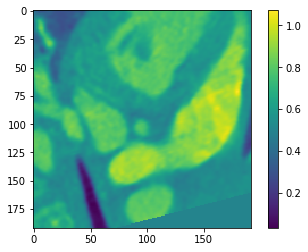

In [4]:
img = f_val.root.X[0,:,:,0]
plt.imshow(img.astype(np.float32))
plt.colorbar()
plt.show()

In [5]:
conts = utility.marchingSquares(img.astype(np.float32),iso=0.65,mode='center')

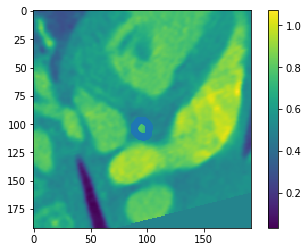

In [6]:
plt.imshow(img.astype(np.float32))
plt.colorbar()
plt.scatter(conts[:,0],conts[:,1])
plt.show()